In [12]:
%pip install gensim
%pip install scikit-learn
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
  Using cached matplotlib-3.9.2-cp312-cp312-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached contourpy-1.3.0-cp312-cp312-macosx_11_0_arm64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pillow-10.4.0-cp312-cp312-macosx_11_0_arm64.whl.metadata (9.2 kB)
  Using cached pyparsing-3.1.4-py3-none-any.whl.metadata (5.1 kB)
Using cached matplotlib-3.9.2-cp312-cp312-macosx_11_0_arm64.whl (7.8 MB)
Using cached contourpy-1.3.0-cp312-cp312-macosx_11_0_arm64.whl (251 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 38.3 MB/s eta 0:00:00
Using cached pillow-10.4.0-cp312-cp312-macosx_11_0_arm64.whl (3.4 MB)
Using cached pyparsing-3.1.4-py3-none-any.whl (104 kB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
import gensim

import gensim.downloader

Part 1: Word Embeddings

In [17]:
# Load pre-trained Word2Vec model trained on wikipedia data

#model = gensim.downloader.load("glove-wiki-gigaword-100")
# Getting the vector for a word

dog = model['midterm']

# Getting the most similar words

print(model.most_similar('midterm'))

# Getting the similarity between two words

print(model.similarity('midterm', 'final'))


[('primaries', 0.6689150333404541), ('midterms', 0.6513818502426147), ('caucuses', 0.6410296559333801), ('mid-term', 0.6386772990226746), ('gubernatorial', 0.6312280893325806), ('election', 0.6280590295791626), ('redistricting', 0.618216335773468), ('governorship', 0.6150888800621033), ('elections', 0.6087819337844849), ('congressional', 0.6037730574607849)]
0.31073207


Part 1a

In [93]:

#find the most similar words to a word of your choice. 
#Does the result make sense? Look up some of the words if you don't know them
#Share and discuss with your group

In [5]:

#we can extract a "capital vector" by subtracting the vector for a country from the vector for its capital
capital= model["midterm"]-model['final']

fra_capital=model["question"]+capital

print(model.most_similar(fra_capital))
#likewise, we can extract a "plural vector" by subtracting the vector for a singular noun from the vector for its plural
plural=model["final"]-model["final"]

print(model.most_similar(plural))

#we can also add vectors together
plural_dogs=model["midterm"]+plural

print(model.most_similar(plural_dogs))



[('midterm', 0.6854923963546753), ('republicans', 0.5167331695556641), ('pollsters', 0.502234697341919), ('strategists', 0.5022332668304443), ('constituents', 0.4982043504714966), ('voters', 0.49560001492500305), ('partisanship', 0.49271947145462036), ('mindful', 0.4917377233505249), ('battleground', 0.486736536026001), ('democrats', 0.48589324951171875)]
[('kissane', 0.0), ('jagua', 0.0), ('termly', 0.0), ('5,430', 0.0), ('bawean', 0.0), ('5,770', 0.0), ('40.64', 0.0), ('hookey', 0.0), ('woundwort', 0.0), ('tigerman', 0.0)]
[('midterm', 1.0), ('primaries', 0.6689150333404541), ('midterms', 0.6513819098472595), ('caucuses', 0.6410295963287354), ('mid-term', 0.6386772990226746), ('gubernatorial', 0.6312281489372253), ('election', 0.6280590295791626), ('redistricting', 0.618216335773468), ('governorship', 0.6150888800621033), ('elections', 0.6087819337844849)]


In [92]:
# this can be used to find examples of data bias in word embeddings

# for example, we can find the most similar words to "doctor" and "nurse"

gender=model["woman"]-model["man"]

print(model.most_similar(gender))
print(model.most_similar(-gender))

model.most_similar(model["doctor"]+gender)



[('menstruating', 0.6102038621902466), ('miscarry', 0.5550355911254883), ('lactating', 0.5421728491783142), ('pre-eclampsia', 0.5129693150520325), ('uterus', 0.5093088746070862), ('ovulating', 0.5070309042930603), ('miscarried', 0.5043483972549438), ('adoptee', 0.5012543201446533), ('comnena', 0.5012539625167847), ('pulecio', 0.500389039516449)]
[('arsene', 0.4388486444950104), ('ancelotti', 0.4215138852596283), ('nistelrooy', 0.41140034794807434), ('strachan', 0.4089668393135071), ('rafa', 0.4072844088077545), ('technicals', 0.40608730912208557), ('allardyce', 0.4018688499927521), ('boss', 0.4010736346244812), ('rangers', 0.39962294697761536), ('utd', 0.3967454135417938)]


[('doctor', 0.8661208152770996),
 ('nurse', 0.7757078409194946),
 ('physician', 0.7128060460090637),
 ('woman', 0.7089030742645264),
 ('doctors', 0.6793615818023682),
 ('pregnant', 0.6787967085838318),
 ('patient', 0.6772217750549316),
 ('dentist', 0.669424295425415),
 ('mother', 0.6586816310882568),
 ('medical', 0.6466937065124512)]

Part 1b

In [ ]:
#try to isolate a specific dimension in the embeddings and add it to multiple words. 
#does this show any bias or assumptions in the data? 
# Discuss with your group and share most interesting dimension in the document

Part 2: Visualization and Embeddings in Space

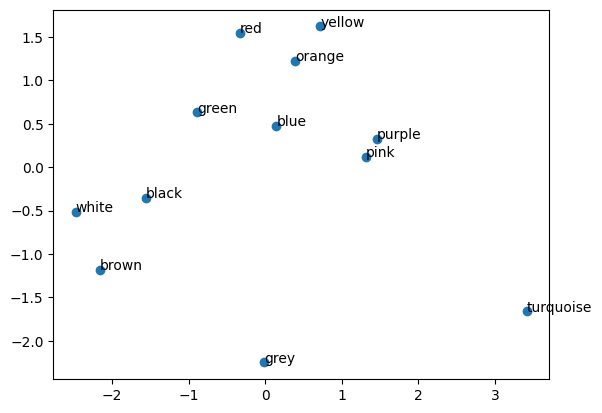

In [14]:
#visualize pca of word embeddings


from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

words=['red','white','green','pink','black','orange','yellow','grey','purple','brown','blue','turquoise']

X=[model[word] for word in words]

#identify clusters of words in the word embeddings at high dimensions

pca=PCA(n_components=2)

X_pca=pca.fit_transform(X)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, word in enumerate(words):
    plt.annotate(word, (X_pca[i,0],X_pca[i,1]))

plt.show()

In [ ]:
#repeat this process with your own set of 10-20 words. 
#Does the proximity between words and overall distances make sense? Work as a group and discuss your individual findings.




In [ ]:
# repeat the process with a different pre-trained model and the same set of words. 
# What has changed in the embedding space? What might this have to do with the training data?
twitter_model= gensim.downloader.load("glove-twitter-100")


Part 3: Embedding reddit posts

In [ ]:
#read in uiuc csv
uiuc=pd.read_csv("uiuc.csv")
mich=pd.read_csv("umich.csv")

#sample so we have even number of samples from each dataset
mich=mich.sample(n=4725)

#assign labels based on origin subreddit of comment
uiuc['label']=1
mich['label']=0

#you will be working with the data csv for the rest of the question
data=pd.concat([uiuc,mich])




In [ ]:
#using the code from project 1, clean the text and create a bag of words representation of the text


In [ ]:
#using the embedding code from last week, plot a pca of all posts in the subreddits data set

#color by the "label" column to see if the two subreddits are separable in the embedding space

# is there a clear separation between the two columns? 

In [ ]:
#here is a function to calculate the average embedding of a cleaned document
import numpy as np
#we can sum together all the embeddings to get a representation of all the concepts expressed in the document
def avg_embedding(sentence, model):
    words=sentence.split()
    embeddings=[model[word] for word in words if word in model]
    return np.mean(embeddings, axis=0)

sentences=["i am running today", "i will jog tomorrow", "i ran yesterday", "i love drawing", "i adore painting", "i used to like pottery"]

#we can then calculate the average embedding of each sentence

avg_embeddings=[avg_embedding(sentence, model) for sentence in sentences]

#remove nan values
avg_embeddings=[embedding for embedding in avg_embeddings if not np.isnan(embedding).any()]
#we can then plot the pca of these embeddings

pca=PCA(n_components=2)

X_pca=pca.fit_transform(avg_embeddings)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, sentence in enumerate(sentences):
    plt.annotate(sentence, (X_pca[i,0],X_pca[i,1]))

plt.show()

In [ ]:

#use this function to calculate the average embedding of each post in the dataset

#plot the pca of the average embeddings, color by the "label" column

#how is this plot different from the previous one?

#is there clear separation? 

Part 4: HuggingFace and BERT

In [ ]:
!pip install transformers

In [100]:
#Please wait until after next week to start

# Use a pipeline as a high-level helper
from transformers import pipeline

#download bert model
pipe = pipeline("text-classification", model="finiteautomata/bertweet-base-sentiment-analysis")


config.json:   0%|          | 0.00/949 [00:00<?, ?B/s]

c:\Users\lucia\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:148: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\lucia\.cache\huggingface\hub\models--finiteautomata--bertweet-base-sentiment-analysis. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


pytorch_model.bin:   0%|          | 0.00/540M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/338 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/843k [00:00<?, ?B/s]

bpe.codes:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/22.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/167 [00:00<?, ?B/s]

emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0


In [101]:
#use the pipeline to classify the sentiment of a sentence of your choice
pipe("I love this class")

[{'label': 'POS', 'score': 0.9923704862594604}]

: 

In [ ]:
#use the pipeline to classify the sentiment of all posts in the reddit dataset
#report the most common sentiment label

In [ ]:
#look at ten sample posts and labels; do you agree with all of them? 

In [ ]:
#is the UIUC or Michigan subreddit more negative?